In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from fredapi import Fred

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
fred_key = 'bc98385fe5ff62e3f7b399b35bbebbba'

In [3]:
fred = Fred(api_key=fred_key)

In [4]:
sp_search = fred.search('S&P',order_by='popularity')
sp_search

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2022-07-18   2022-07-18   
CSUSHPINSA              CSUSHPINSA     2022-07-18   2022-07-18   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2022-07-18   2022-07-18   
SP500                        SP500     2022-07-18   2022-07-18   
MEHOINUSA672N        MEHOINUSA672N     2022-07-18   2022-07-18   
...                            ...            ...          ...   
LABSHPCLA156NRUG  LABSHPCLA156NRUG     2022-07-18   2022-07-18   
GCT1502MS                GCT1502MS     2022-07-18   2022-07-18   
CGDPOSJPA666NRUG  CGDPOSJPA666NRUG     2022-07-18   2022-07-18   
HC01ESTVC1724031  HC01ESTVC1724031     2022-07-18   2022-07-18   
RGDPNAATA666NRUG  RGDPNAATA666NRUG     2022-07-18   2022-07-18   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA          S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
SP500                                                       S&P 500   
MEHOINUSA672N     Real Median Household Income in the United States   
...                                                             ...   
LABSHPCLA156NRUG  Share of Labour Compensation in GDP at Current...   
GCT1502MS               Bachelor's Degree or Higher for Mississippi   
CGDPOSJPA666NRUG  Output-side Real GDP at Current Purchasing Pow...   
HC01ESTVC1724031  Bachelor's Degree or Higher (5-year estimate) ...   
RGDPNAATA666NRUG   Real GDP at Constant National Prices for Austria   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2022-07-14  Daily, Close   
CSUSHPINSA              1987-01-01      2022-04-01       Monthly   
BAMLH0A0HYM2EY          1996-12-31      2022-07-14  Daily, Close   
SP500                   2012-07-16      2022-07-15  Daily, Close   
MEHOINUSA672N           1984-01-01      2020-01-01        Annual   
...                            ...             ...           ...   
LABSHPCLA156NRUG        1951-01-01      2019-01-01        Annual   
GCT1502MS               2006-01-01      2020-01-01        Annual   
CGDPOSJPA666NRUG        1950-01-01      2019-01-01        Annual   
HC01ESTVC1724031        2010-01-01      2020-01-01        Annual   
RGDPNAATA666NRUG        1950-01-01      2019-01-01        Annual   

                 frequency_short                           units  \
series id                                                          
BAMLH0A0HYM2                   D                         Percent   
CSUSHPINSA                     M              Index Jan 2000=100   
BAMLH0A0HYM2EY                 D                         Percent   
SP500                          D                           Index   
MEHOINUSA672N                  A  2020 CPI-U-RS Adjusted Dollars   
...                          ...                             ...   
LABSHPCLA156NRUG               A                           Ratio   
GCT1502MS                      A                         Percent   
CGDPOSJPA666NRUG               A   Millions of 2017 U.S. Dollars   
HC01ESTVC1724031               A                         Percent   
RGDPNAATA666NRUG               A   Millions of 2017 U.S. Dollars   

                               units_short      seasonal_adjustment  \
series id                                                             
BAMLH0A0HYM2                             %  Not Seasonally Adjusted   
CSUSHPINSA              Index Jan 2000=100  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                           %  Not Seasonally Adjusted   
SP500                                Index  Not Seasonally Adjusted   
MEHOINUSA672N     2020 CPI-U-RS Adjusted $  Not Seaso

In [5]:
sp500 = fred.get_series(series_id='SP500')
sp500

2012-07-16    1353.64
2012-07-17    1363.67
2012-07-18    1372.78
2012-07-19    1376.51
2012-07-20    1362.66
               ...   
2022-07-11    3854.43
2022-07-12    3818.80
2022-07-13    3801.78
2022-07-14    3790.38
2022-07-15    3863.16
Length: 2610, dtype: float64

<AxesSubplot:title={'center':'S&P500'}>

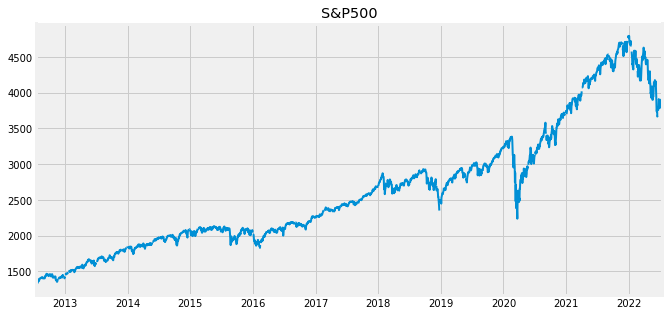

In [6]:
sp500.plot(figsize=(10,5),title='S&P500',lw=2)

In [7]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [8]:
all_results = []

for myid in unemp_df.index:
    if len(myid) == 4:
        results = fred.get_series(series_id = myid)
        results = results.to_frame(name=myid)
        all_results.append(results)
    
unemp_results = pd.concat(all_results,axis=1)

In [9]:
unemp_results.head()

CAUR  FLUR  TXUR  NYUR  OHUR  MIUR  PAUR  MAUR  ALUR  GAUR  ILUR  \
1976-01-01   9.2   9.7   5.8  10.3   8.1   9.9   8.0  10.5   6.6   8.4   6.6   
1976-02-01   9.2   9.7   5.8  10.3   8.1   9.9   8.1  10.5   6.6   8.4   6.6   
1976-03-01   9.1   9.6   5.9  10.2   8.1   9.9   8.1  10.5   6.6   8.4   6.6   
1976-04-01   9.1   9.5   5.9  10.2   8.0   9.8   8.1  10.3   6.5   8.3   6.6   
1976-05-01   9.0   9.3   5.9  10.1   7.8   9.6   8.1  10.1   6.4   8.1   6.6   

            WAUR  WIUR  TNUR  NCUR  AZUR  VAUR  MNUR  NJUR  ORUR  INUR  KYUR  \
1976-01-01   8.5   5.8   6.0   6.4  10.2   6.1   6.0  10.3   9.5   6.6   5.6   
1976-02-01   8.5   5.8   6.0   6.4  10.2   6.1   6.0  10.3   9.5   6.6   5.6   
1976-03-01   8.4   5.7   6.0   6.4  10.1   6.1   5.9  10.3   9.4   6.5   5.6   
1976-04-01   8.5   5.6   6.0   6.3  10.0   6.0   5.8  10.3   9.2   6.3   5.6   
1976-05-01   8.5   5.5   5.9   6.1   9.8   5.9   5.7  10.3   9.1   6.0   5.5   

            COUR  SCUR  NVUR  WVUR  MOUR  LAUR  OKUR  NMUR  IAUR  UTUR  ARUR  \
1976-01-01   5.8   7.4   9.2   7.5   5.9   6.3   5.8   8.6   4.3   5.8   7.3   
1976-02-01   5.7   7.4   9.2   7.5   5.9   6.3   5.8   8.7   4.3   5.9   7.3   
1976-03-01   5.7   7.3   9.2   7.5   5.9   6.3   5.8   8.7   4.3   5.8   7.3   
1976-04-01   5.6   7.2   9.0   7.5   6.0   6.4   5.8   8.6   4.2   5.8   7.2   
1976-05-01   5.6   7.0   8.9   7.4   6.0   6.5   5.7   8.6   4.1   5.7   7.1   

            MDUR  KSUR  AKUR  CTUR  HIUR  MSUR  MEUR  SDUR  PRUR  MTUR  NDUR  \
1976-01-01   6.4   4.2   7.1   9.8   9.8   6.7   8.7   3.3  19.6   5.8   3.4   
1976-02-01   6.4   4.2   7.1   9.8   9.8   6.7   8.7   3.3  19.5   5.8   3.4   
1976-03-01   6.4   4.2   7.0   9.8   9.8   6.6   8.6   3.2  19.3   5.8   3.4   
1976-04-01   6.4   4.2   6.9   9.6   9.7   6.4   8.6   3.1  19.0   5.8   3.5   
1976-05-01   6.5   4.2   6.9   9.4   9.4   6.3   8.5   3.1  18.9   5.8   3.6   

            NHUR  NEUR  DCUR  IDUR  DEUR  WYUR  VTUR  RIUR  
1976-01-01   6.5   3.3   8.7   5.6   8.0   4.1   8.6   7.8  
1976-02-01   6.5   3.3   8.7   5.6   8.0   4.1   8.6   7.8  
1976-03-01   6.5   3.3   8.6   5.6   8.0   4.1   8.6   7.7  
1976-04-01   6.5   3.2   8.5   5.6   8.1   4.0   8.6   7.7  
1976-05-01   6.5   3.1   8.4   5.6   8.3   3.9   8.5   7.7

In [10]:
# PRUR is Puerto Rico
# DCUR is District of Columbia
# we only want to include states

unemp_states = unemp_results.drop(['PRUR'
                                   ,'DCUR'],axis=1)
unemp_states = unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [11]:
px.line(unemp_states)

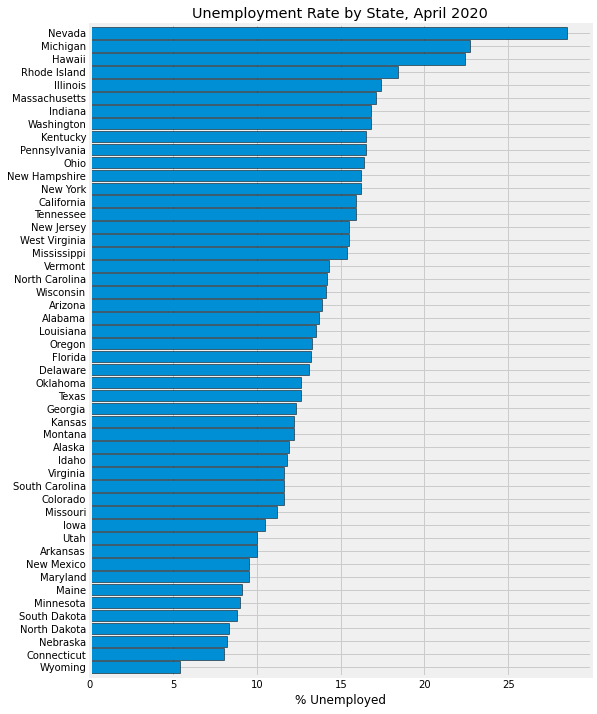

In [12]:
ax = unemp_states.loc[unemp_states.index=='2020-04-01',:].T.sort_values('2020-04-01').plot(kind='barh',figsize=(8,12),width=0.9,edgecolor='black',title='Unemployment Rate by State, April 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [13]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [14]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
#     participation rates for states have id length of 7 for some reason
    if len(myid) == 7:     
        results = fred.get_series(series_id = myid)
        results = results.to_frame(name=myid)
        all_results.append(results)

part_states = pd.concat(all_results,axis=1)
part_states = part_states.drop(['LBSSA11','CIVPART'],axis=1)
part_states = part_states.dropna()

In [15]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [16]:
unemp_states.head()

California  Florida  Texas  New York  Ohio  Michigan  \
1976-01-01         9.2      9.7    5.8      10.3   8.1       9.9   
1976-02-01         9.2      9.7    5.8      10.3   8.1       9.9   
1976-03-01         9.1      9.6    5.9      10.2   8.1       9.9   
1976-04-01         9.1      9.5    5.9      10.2   8.0       9.8   
1976-05-01         9.0      9.3    5.9      10.1   7.8       9.6   

            Pennsylvania  Massachusetts  Alabama  Georgia  Illinois  \
1976-01-01           8.0           10.5      6.6      8.4       6.6   
1976-02-01           8.1           10.5      6.6      8.4       6.6   
1976-03-01           8.1           10.5      6.6      8.4       6.6   
1976-04-01           8.1           10.3      6.5      8.3       6.6   
1976-05-01           8.1           10.1      6.4      8.1       6.6   

            Washington  Wisconsin  Tennessee  North Carolina  Arizona  \
1976-01-01         8.5        5.8        6.0             6.4     10.2   
1976-02-01         8.5        5.8        6.0             6.4     10.2   
1976-03-01         8.4        5.7        6.0             6.4     10.1   
1976-04-01         8.5        5.6        6.0             6.3     10.0   
1976-05-01         8.5        5.5        5.9             6.1      9.8   

            Virginia  Minnesota  New Jersey  Oregon  Indiana  Kentucky  \
1976-01-01       6.1        6.0        10.3     9.5      6.6       5.6   
1976-02-01       6.1        6.0        10.3     9.5      6.6       5.6   
1976-03-01       6.1        5.9        10.3     9.4      6.5       5.6   
1976-04-01       6.0        5.8        10.3     9.2      6.3       5.6   
1976-05-01       5.9        5.7        10.3     9.1      6.0       5.5   

            Colorado  South Carolina  Nevada  West Virginia  Missouri  \
1976-01-01       5.8             7.4     9.2            7.5       5.9   
1976-02-01       5.7             7.4     9.2            7.5       5.9   
1976-03-01       5.7             7.3     9.2            7.5       5.9   
1976-04-01       5.6             7.2     9.0            7.5       6.0   
1976-05-01       5.6             7.0     8.9            7.4       6.0   

            Louisiana  Oklahoma  New Mexico  Iowa  Utah  Arkansas  Maryland  \
1976-01-01        6.3       5.8         8.6   4.3   5.8       7.3       6.4   
1976-02-01        6.3       5.8         8.7   4.3   5.9       7.3       6.4   
1976-03-01        6.3       5.8         8.7   4.3   5.8       7.3       6.4   
1976-04-01        6.4       5.8         8.6   4.2   5.8       7.2       6.4   
1976-05-01        6.5       5.7         8.6   4.1   5.7       7.1       6.5   

            Kansas  Alaska  Connecticut  Hawaii  Mississippi  Maine  \
1976-01-01     4.2     7.1          9.8     9.8          6.7    8.7   
1976-02-01     4.2     7.1          9.8     9.8          6.7    8.7   
1976-03-01     4.2     7.0          9.8     9.8          6.6    8.6   
1976-04-01     4.2     6.9          9.6     9.7          6.4    8.6   
1976-05-01     4.2     6.9          9.4     9.4          6.3    8.5   

            South Dakota  Montana  North Dakota  New Hampshire  Nebraska  \
1976-01-01           3.3      5.8           3.4            6.5       3.3   
1976-02-01           3.3      5.8           3.4            6.5       3.3   
1976-03-01           3.2      5.8           3.4            6.5       3.3   
1976-04-01           3.1      5.8           3.5            6.5       3.2   
1976-05-01           3.1      5.8           3.6            6.5       3.1   

            Idaho  Delaware  Wyoming  Vermont  Rhode Island  
1976-01-01    5.6       8.0      4.1      8.6           7.8  
1976-02-01    5.6       8.0      4.1      8.6           7.8  
1976-03-01    5.6       8.0      4.1      8.6           7.7  
1976-04-01    5.6       8.1      4.0      8.6           7.7  
1976-05-01    5.6       8.3      3.9      8.5           7.7

In [17]:
part_states.head()

California  Florida  Michigan  New York  Minnesota  Kentucky  \
1976-01-01        62.6     55.8      61.6      58.0       65.6      60.5   
1976-02-01        62.4     55.7      61.5      58.0       65.5      60.3   
1976-03-01        62.2     55.5      61.5      58.0       65.4      60.2   
1976-04-01        62.2     55.5      61.6      58.0       65.4      60.1   
1976-05-01        62.3     55.4      61.7      58.1       65.5      60.1   

            Ohio  Wisconsin  Alabama  Georgia  Tennessee  Texas  Colorado  \
1976-01-01  61.7       65.6     57.0     63.7       59.6   63.8      67.2   
1976-02-01  61.7       65.5     56.9     63.6       59.4   63.5      67.0   
1976-03-01  61.7       65.4     56.8     63.5       59.3   63.4      66.8   
1976-04-01  61.6       65.4     56.8     63.5       59.3   63.5      66.6   
1976-05-01  61.6       65.5     56.8     63.6       59.4   63.6      66.5   

            Massachusetts  West Virginia  North Carolina  Indiana  New Mexico  \
1976-01-01           64.8           52.5            66.5     64.0        60.8   
1976-02-01           64.7           52.4            66.3     63.9        60.5   
1976-03-01           64.6           52.3            66.2     63.8        60.3   
1976-04-01           64.6           52.3            66.2     63.8        60.3   
1976-05-01           64.6           52.2            66.3     63.9        60.3   

            Illinois  Pennsylvania  South Carolina  Missouri  Iowa  Kansas  \
1976-01-01      63.0          58.4            65.3      60.5  64.4    65.1   
1976-02-01      63.0          58.3            65.2      60.3  64.3    65.0   
1976-03-01      62.9          58.3            65.0      60.3  64.2    64.9   
1976-04-01      62.9          58.3            64.9      60.4  64.1    65.0   
1976-05-01      63.0          58.3            64.7      60.6  64.1    65.1   

            Maryland  Virginia  Arkansas  Mississippi  Utah  Washington  \
1976-01-01      64.3      65.9      57.9         58.8  62.8        60.9   
1976-02-01      64.2      65.8      57.8         58.6  62.6        60.7   
1976-03-01      64.1      65.6      57.7         58.5  62.5        60.6   
1976-04-01      64.1      65.5      57.7         58.5  62.5        60.6   
1976-05-01      64.1      65.4      57.7         58.5  62.6        60.7   

            Oklahoma  Arizona  Louisiana  Oregon  New Jersey  Alaska  \
1976-01-01      59.3     59.5       56.8    62.9        61.5    69.0   
1976-02-01      59.2     59.2       56.6    62.7        61.4    68.4   
1976-03-01      59.1     59.1       56.5    62.5        61.4    67.8   
1976-04-01      59.0     59.1       56.4    62.4        61.5    67.9   
1976-05-01      59.0     59.1       56.4    62.5        61.6    67.9   

            Connecticut  Nevada  Nebraska  South Dakota  Idaho  Maine  \
1976-01-01         64.2    71.3      64.9          64.6   63.0   62.1   
1976-02-01         64.1    70.8      64.9          64.4   62.8   61.9   
1976-03-01         64.0    70.5      64.8          64.4   62.7   61.9   
1976-04-01         64.1    70.4      64.8          64.3   62.7   61.8   
1976-05-01         64.3    70.5      64.8          64.3   62.8   61.7   

            Montana  Vermont  New Hampshire  Hawaii  Wyoming  North Dakota  \
1976-01-01     62.7     63.6           65.9    69.9     65.3          62.6   
1976-02-01     62.5     63.4           65.6    69.6     64.9          62.4   
1976-03-01     62.4     63.2           65.6    69.6     64.7          62.3   
1976-04-01     62.3     63.5           65.7    69.4     64.9          62.5   
1976-05-01     62.2     63.6           66.0    69.3     65.2          62.6   

            Rhode Island  Delaware  
1976-01-01          63.8      62.7  
1976-02-01          63.7      62.5  
1976-03-01          63.6      62.5  
1976-04-01          63.7      62.4  
1976-05-01          63.6      62.4

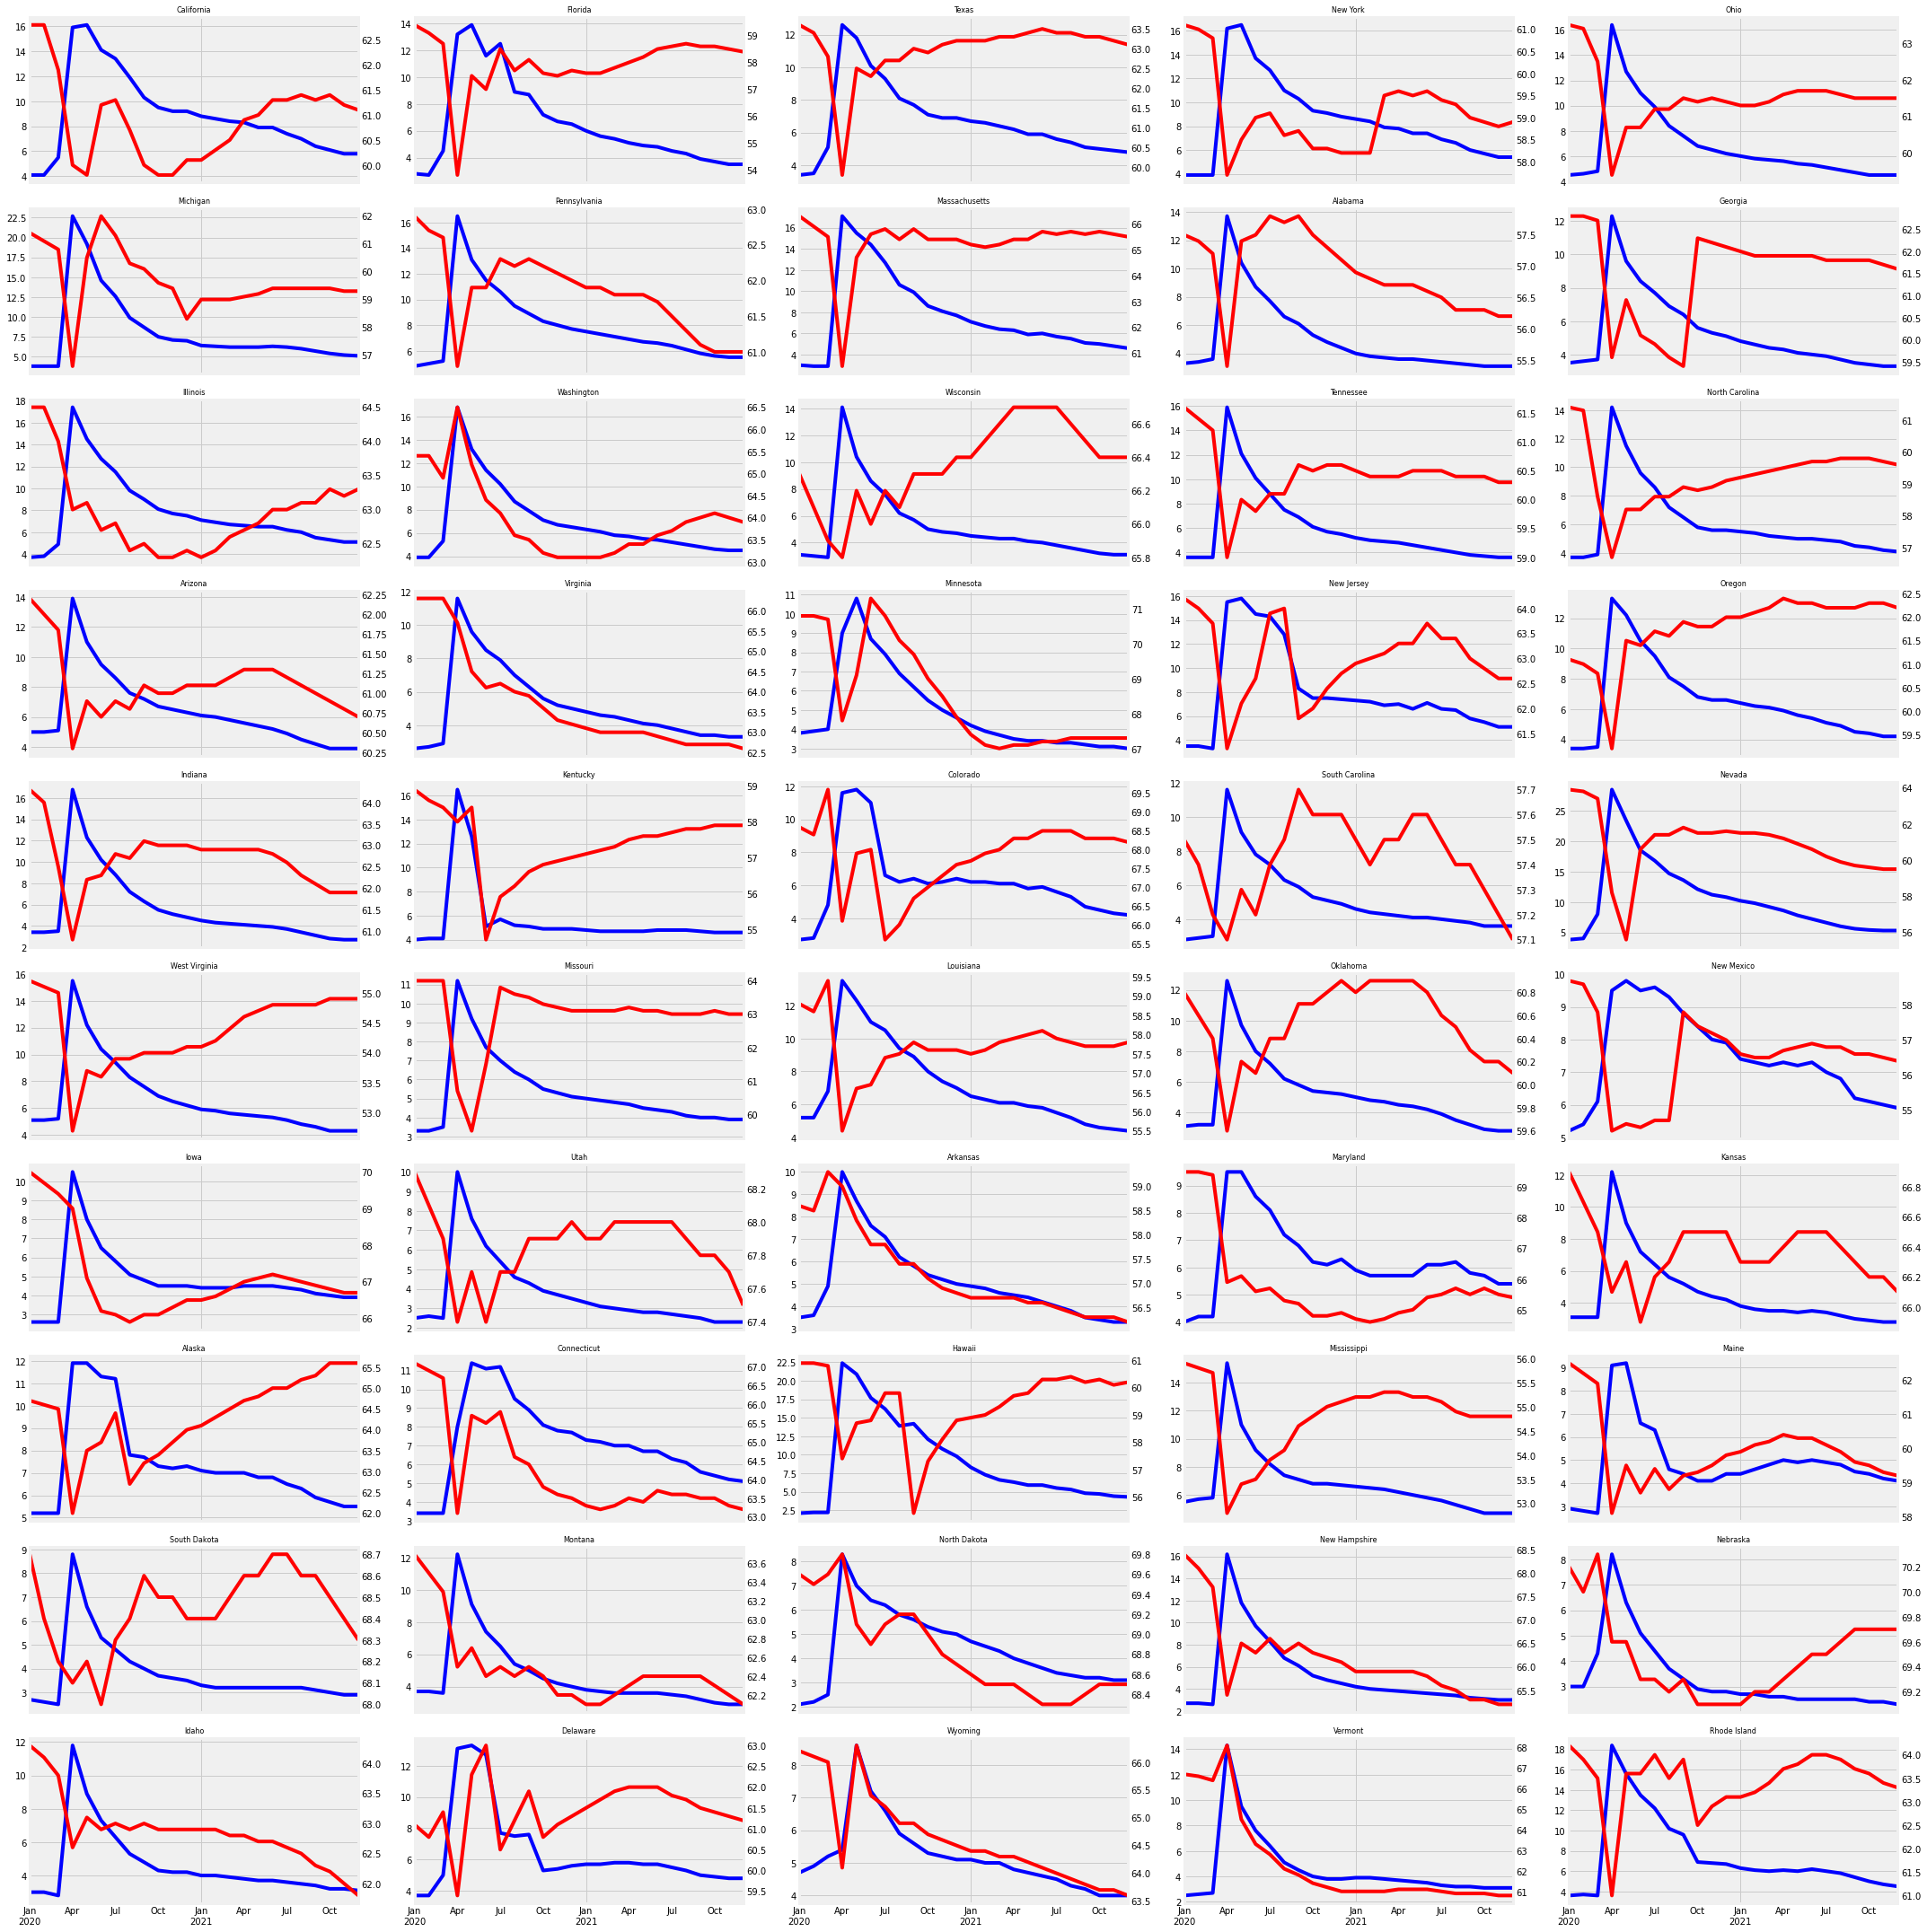

In [19]:
fig, axs = plt.subplots(10,5,figsize=(30,30),sharex=True)
axs = axs.flatten()

for i,state in enumerate(unemp_states.columns):
    ax2 = axs[i].twinx()
    unemp_states.loc[unemp_states.index ]
    unemp_states.loc[(unemp_states.index >= '2020') & (unemp_states.index < '2022')][state].plot(ax=axs[i],label='Unemployment',color='b')
    part_states.loc[(part_states.index >= '2020') & (part_states.index < '2022')][state].plot(ax=ax2 ,label='Participation',color='r')
    ax2.grid(False)
    axs[i].set_title(state,fontsize=8)

plt.tight_layout()
plt.show()
